# Guia rápido de plotagem - `matplotlib`

- Plotagem genérica em modo explícito (interface "OO-like")

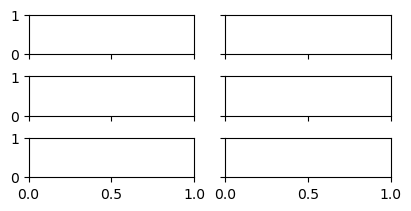

In [1]:
import matplotlib.pyplot as plt

# fig é objeto matplotlib.Figure
# ax é objeto matplotlib.Axes
fig, ax = plt.subplots(nrows=3,
                       ncols=2,
                       sharex=True,
                       sharey=True,
                       num=1,
                       clear=True,
                       constrained_layout=True, # controle de interpadding
                       figsize=(4,2) 
                       ) 

- Controle da escala de eixos

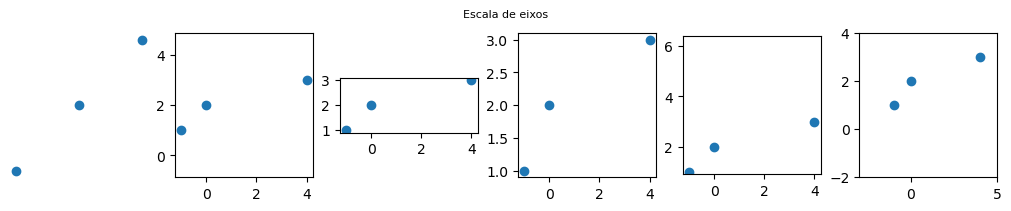

In [2]:
fig, ax = plt.subplots(1,6,figsize=(10,2),constrained_layout=True)
fig.suptitle('Escala de eixos',fontsize=8)

xmin, xmax, ymin, ymax = ax[0].axis('off')
ax[0].plot([-1,0,1],[1,2,3],'o')

# mesma escala; círculos ficam circulares alterando limites
ax[1].plot([-1,0,4],[1,2,3],'o')
ax[1].axis('equal')

# mesma escala; círculos ficam circulares alterando dimensões da Figure
ax[2].plot([-1,0,4],[1,2,3],'o')
ax[2].axis('scaled')

# limites grandes o bastante para acomodação aos dados
ax[3].plot([-1,0,4],[1,2,3],'o')
ax[3].axis('tight')

# xmax - xmin = ymax - ymin
ax[4].plot([-1,0,4],[1,2,3],'o')
ax[4].axis('square')

# limites customizados
ax[5].plot([-1,0,4],[1,2,3],'o')
ax[5].axis([-3,5,-2,4]) # 1a. forma
ax[5].set_xlim(-3,5); ax[5].set_ylim(-2,4); # 2a. forma

- Visibilidade de eixos

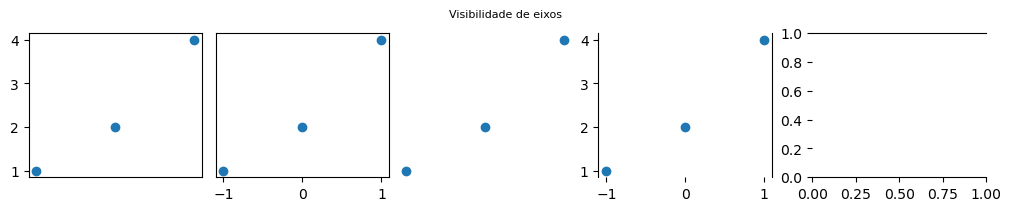

In [3]:
fig, ax = plt.subplots(1,5,figsize=(10,2),constrained_layout=True)
fig.suptitle('Visibilidade de eixos',fontsize=8)

ax[0].get_xaxis().set_visible(False)
ax[0].plot([-1,0,1],[1,2,4],'o')

ax[1].get_yaxis().set_visible(False)
ax[1].plot([-1,0,1],[1,2,4],'o')

ax[2].set_axis_off() # axis('off')
ax[2].plot([-1,0,1],[1,2,4],'o')

ax[3].set_visible(True) # visibilidade do Artist
ax[3].plot([-1,0,1],[1,2,4],'o')
ax[3].spines['top'].set_visible(False)
ax[3].spines.bottom.set_visible(False)

ax[4].spines['left'].set_visible(False)
ax[4].spines.right.set_visible(False)

## Mosaicos

- Layouts com `GridSpec`

    - `gs = fig.add_gridspec(m,n)`: cria mosaico
    - `fig.add_subplot(gs[m:,n:])`: posiciona plot no mosaico

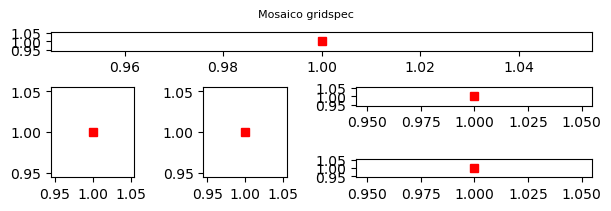

In [4]:
fig = plt.figure(figsize=(6,2),constrained_layout=True) # figura de background
fig.suptitle('Mosaico gridspec',fontsize=8)
gs = fig.add_gridspec(3,4) 
fig_ax1 = fig.add_subplot(gs[0,:])
fig_ax2 = fig.add_subplot(gs[1:,0])
fig_ax3 = fig.add_subplot(gs[1:,1])
fig_ax4 = fig.add_subplot(gs[1,2:])
fig_ax5 = fig.add_subplot(gs[2,2:])

for eixo in fig.axes:
    eixo.plot(1,1,'rs')

- 'gridspec' com larguras e alturas variáveis

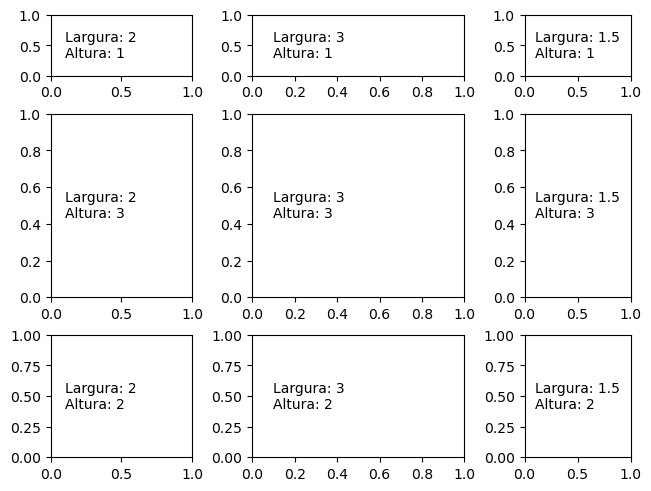

In [5]:
fig = plt.figure(constrained_layout=True)
w = [2, 3, 1.5]
h = [1, 3, 2]
gs = fig.add_gridspec(ncols=3, 
                      nrows=3, 
                      width_ratios=w,
                      height_ratios=h)


for row in range(3):
    for col in range(3):
        ax = fig.add_subplot(gs[row, col])
        label = f'Largura: {w[col]}\nAltura: {h[row]}'
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

- 'subgridspec'

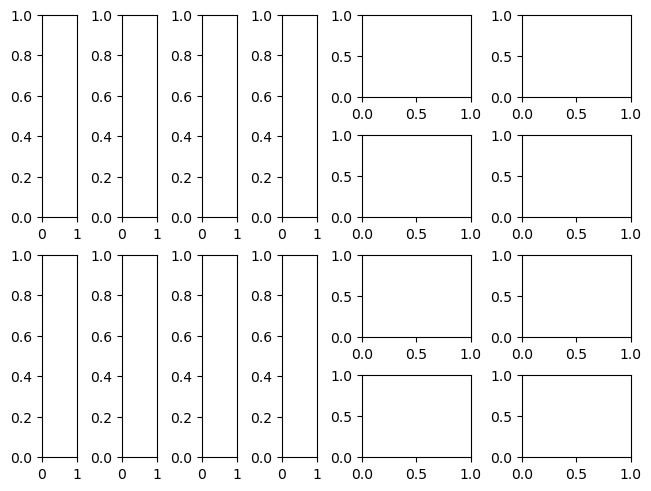

In [6]:
f = plt.figure(constrained_layout=True)

# primeiro nível
gs0 = f.add_gridspec(1, 2) 

# segundo nível
gs00 = gs0[0].subgridspec(2, 4)
gs01 = gs0[1].subgridspec(4, 2)

for a in range(2):
    for b in range(4):
        f.add_subplot(gs00[a, b])
        f.add_subplot(gs01[b, a])

- Eixos embutidos

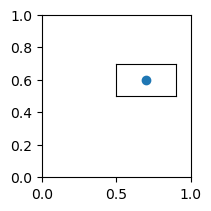

In [7]:
fig, ax = plt.subplots(figsize=(2,2),constrained_layout=True)
x0, y0 = 0.5,0.5
width, height = 0.4,0.2
ax2 = ax.inset_axes(bounds=[x0,y0,width,height])
ax2.plot(0.5,0.5,'o')
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)



- Eixos apensados

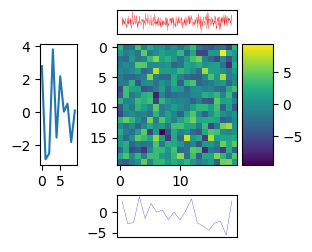

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# dado
data = np.random.normal(0,3,size=(20,20))

# figura
fig,ax = plt.subplots(figsize=(3,3))
im = ax.imshow(data)

# divisor
divider = make_axes_locatable(ax)

# eixos
ax_left = divider.append_axes("left", size="30%", pad=0.4) 
ax_left.plot(data.flatten()[:10])

ax_top = divider.append_axes("top", size="20%", pad=0.1) 
ax_top.plot(data.flatten(),c='r',lw=0.2)
ax_top.axis('tight')
ax_top.get_xaxis().set_visible(False); ax_top.get_yaxis().set_visible(False)

ax_right = divider.append_axes("right", size="25%", pad=0.05) 
plt.colorbar(im,cax=ax_right)

ax_bot = divider.append_axes("bottom", size="35%", pad=0.3) 
ax_bot.plot(data.flatten()[:20],c='b',lw=0.2)
ax_bot.axis('tight')
ax_bot.get_xaxis().set_visible(False); ax_top.get_yaxis().set_visible(False)


## Estilo de linha e _cap_

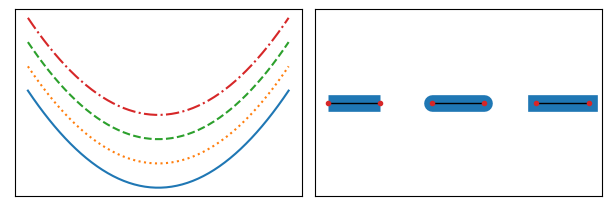

In [9]:
fig, ax = plt.subplots(1,2,figsize=(6,2),constrained_layout=True)
x = np.linspace(-2,2)

# estilo de linha
linestyles = ['-',':','--','-.']

gap = 1
for lsi in linestyles:
    ax[0].plot(x,x**2 + gap,ls=lsi)
    gap += 1

ax[0].xaxis.set_visible(False)
ax[0].yaxis.set_visible(False)

# estilo de cap
for x, style in enumerate(['butt', 'round', 'projecting']):
    xx = [x, x+0.5]
    yy = [0, 0]
    ax[1].plot(xx, yy, lw=12, color='tab:blue', solid_capstyle=style)
    ax[1].plot(xx, yy, lw=1, color='black')
    ax[1].plot(xx, yy, 'o', color='tab:red', markersize=3)

ax[1].xaxis.set_visible(False)
ax[1].yaxis.set_visible(False)

## Marcadores

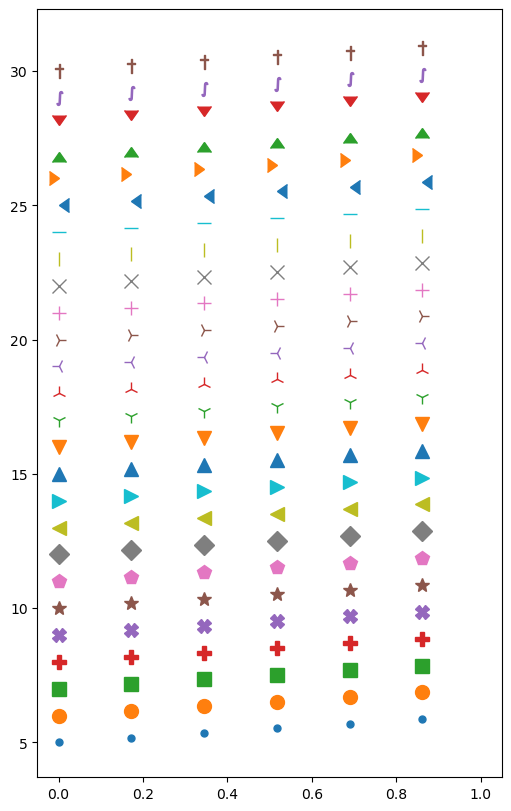

In [10]:
markers = ['.','o','s','P','X','*','p','D','<','>','^','v', \
             '1','2','3','4','+','x','|','_',4,5,6,7, \
         '$\\int$','$\\dagger$' ]

fig, ax = plt.subplots(figsize=(5,8),constrained_layout=True)

dom = np.linspace(0,1,30)
gap = 5
for i in range(len(markers)):
    ax.plot(dom,dom + gap,ls='',lw=0.5,ms=10,marker=markers[i],markevery=5)
    gap += 1

ax.axis('tight');

## Controle de ticks e labels

- Controle de ticks dado pelo módulo `matplotlib.ticker`
- Customização baseada em 4 pares de métodos básicos de _locators_ e _formatters_:
    - `ax.xaxis.set_major_locator()` e `ax.yaxis.set_major_locator()`
    - `ax.xaxis.set_minor_locator()` e `ax.yaxis.set_minor_locator()`
    - `ax.xaxis.set_major_formatter()` e `ax.yaxis.set_major_formatter()`
    - `ax.xaxis.set_minor_formatter()` e `ax.yaxis.set_minor_formatter()`

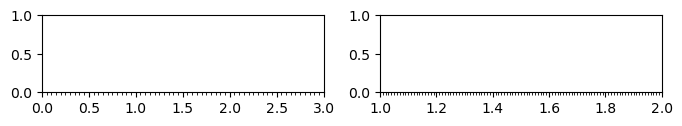

In [11]:
from matplotlib.ticker import MultipleLocator as ML
from matplotlib.ticker import ScalarFormatter as SF

fig, ax = plt.subplots(1,2,figsize=(8,1))
ax[0].set_xlim(0,3)
ax[0].xaxis.set_minor_locator (ML(0.05))
ax[1].set_xlim(1,2)
ax[1].xaxis.set_minor_locator (ML(0.01))

/var/folders/ll/g0vl8b194pbfyp4cwpzz4p740000gn/T/ipykernel_31821/3390216078.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(),weight='bold');


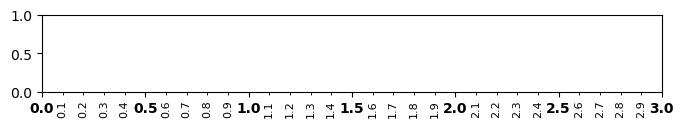

In [12]:
fig, ax = plt.subplots(figsize=(8,1))
ax.set_xlim(0,3)
ax.xaxis.set_minor_locator (ML(0.1))
ax.xaxis.set_minor_formatter (SF())
ax.tick_params(axis='x' ,which='minor', rotation=90, labelsize=8)
ax.set_xticklabels(ax.get_xticks(),weight='bold');

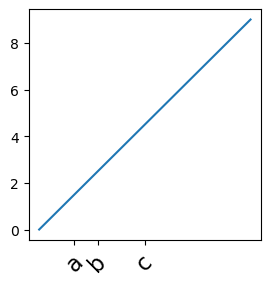

In [13]:
import matplotlib.pyplot as plt, matplotlib.ticker as mticker

x = list(range(10))

fig, ax = plt.subplots(figsize=(3,3))
ax.plot(x,x)
ax.xaxis.set_major_locator(mticker.FixedLocator([1.5,2.5,4.5]))
ax.set_xticklabels(['a','b','c'])
ax.xaxis.set_tick_params(rotation=45, labelsize=16) # Other solution: ax.tick_params(axis='x', rotation=25)

### Controle de ticks em formato de datas

- Controle dado pelo método `matplotlib.dates`
- Aplicar _locators_ para dia, mês, ano, dia de semana etc.

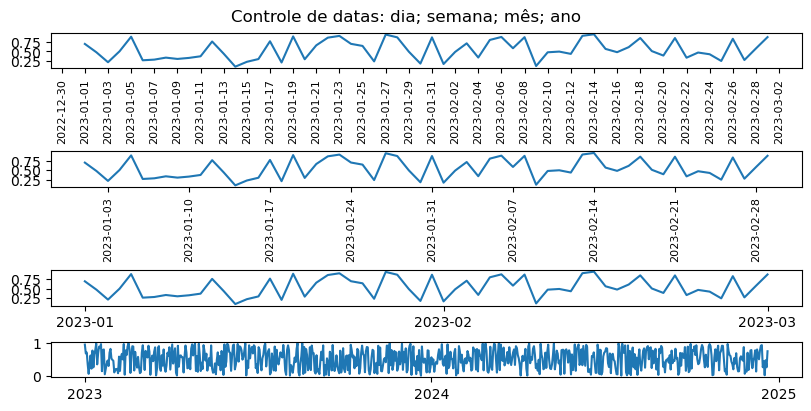

In [14]:
import matplotlib.dates as mdates
import numpy as np
import datetime

period = 60
x = [datetime.date(2023,1,1) + datetime.timedelta(days=i) for i in range(period)]
y = np.random.rand(period)

fig, ax = plt.subplots(4,1,figsize=(8,4),constrained_layout=True)

# dia
ax[0].plot(x,y)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2)) # intervalo de 2 dias
ax[0].tick_params(axis='x' ,which='major', rotation=90, labelsize=8)

# semana
ax[1].plot(x,y)
ax[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax[1].tick_params(axis='x' ,which='major', rotation=90, labelsize=8)

# mês
ax[2].plot(x,y)
ax[2].xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# ano
period = 720
x2 = [datetime.date(2023,1,1) + datetime.timedelta(days=i) for i in range(period)]
y2 = np.random.rand(period)
ax[3].plot(x2,y2)
ax[3].xaxis.set_major_locator(mdates.YearLocator())

fig.suptitle('Controle de datas: dia; semana; mês; ano');

- Aplicar _formatters_ para tipos de strings. Placeholders aceitos:
    - `%Y`: Ano com século como um número decimal (por exemplo, 2023).
    - `%y`: Ano sem o século como um número decimal (por exemplo, 23 para 2023).
    - `%m`: Mês como um número decimal com zero à esquerda (por exemplo, 04 para abril).
    - `%d`: Dia do mês como um número decimal com zero à esquerda (por exemplo, 15).
    - `%H`: Hora (relógio de 24 horas) como um número decimal com zero à esquerda (por exemplo, 09).
    - `%M`: Minuto como um número decimal com zero à esquerda (por exemplo, 05).
    - `%S`: Segundo como um número decimal com zero à esquerda (por exemplo, 07).
    - `%A`: Nome completo do dia da semana (por exemplo, "Domingo").
    - `%a`: Nome abreviado do dia da semana (por exemplo, "Dom").
    - `%B`: Nome completo do mês (por exemplo, "Abril").
    - `%b` ou `%h`: Nome abreviado do mês (por exemplo, "Abr").
    - `%j`: Dia do ano como um número decimal com zero à esquerda (por exemplo, 105 para 15 de abril).
    - `%U`: Número da semana do ano (domingo como o primeiro dia da semana) como um número decimal com zero à esquerda.
    - `%W`: Número da semana do ano (segunda-feira como o primeiro dia da semana) como um número decimal com zero à esquerda.
    - `%Z`: Nome do fuso horário (por exemplo, "UTC" ou "EST").
    - `%%`: Um caractere '%' literal.


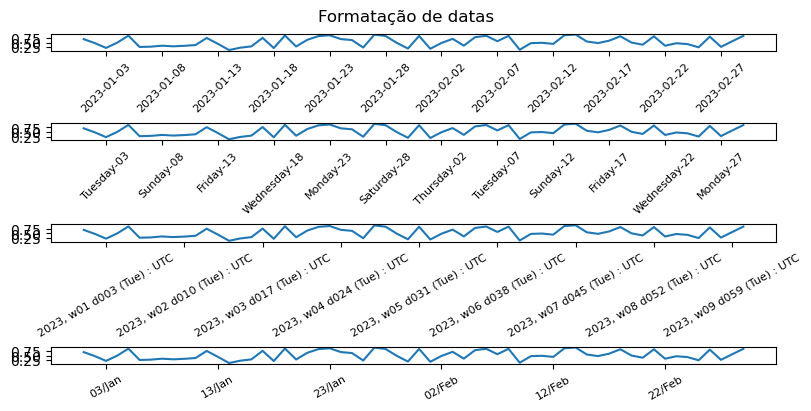

In [15]:
fig, ax = plt.subplots(4,1,figsize=(8,4),constrained_layout=True)

# dia
ax[0].plot(x,y)
ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[0].tick_params(axis='x' ,which='major', rotation=45, labelsize=8)

ax[1].plot(x,y)
ax[1].xaxis.set_major_locator(mdates.DayLocator(interval=5)) 
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%A-%d'))
ax[1].tick_params(axis='x' ,which='major', rotation=45, labelsize=8)

ax[2].plot(x,y)
ax[2].xaxis.set_major_locator(mdates.DayLocator(interval=7)) 
ax[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y, w%U d%j (%a) : %Z'))
ax[2].tick_params(axis='x' ,which='major', rotation=30, labelsize=8)

ax[3].plot(x,y)
ax[3].xaxis.set_major_locator(mdates.DayLocator(interval=10)) 
ax[3].xaxis.set_major_formatter(mdates.DateFormatter('%d/%b'))
ax[3].tick_params(axis='x' ,which='major', rotation=30, labelsize=8)

fig.suptitle('Formatação de datas');

## Impressão de propriedades padronizadas/customizadas

In [16]:
def get_prop(prop):
    from matplotlib import rcParams
    from re import match

    props = {}
    for k,v in rcParams.items():
        if match(prop,k):                    
            props[k] = v
    return props

# get_prop('axes')

## Impressão de paletas de cores disponíveis

In [17]:
def print_palette(opt):
    """Print matplotlib color pallete according to category.
       
       Parameters:
       opt (int): option for palette
            1: uniform; 2: divergent; 3: ciclic; 4: generic
        
    """
        
    seq_uniform = {'viridis', 'plasma', 'inferno', 'magma', 'cividis'}
    seq_grp_1 = {'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn','YlGn'}
    seq_grp_2 = {'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia', 'hot', 'afmhot', 'gist_heat','copper'}
    sequential = seq_uniform.union(seq_grp_1).union(seq_grp_2)
    divergent = {'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr','seismic'}
    ciclic = {'twilight', 'twilight_shifted', 'hsv'}
    generic = {'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral','gist_ncar'}

    selector = {1:sequential, 2:divergent, 3:ciclic, 4:generic}

    for k,v in selector.items():
        if k == opt: print(v)


## Renderização de Latex

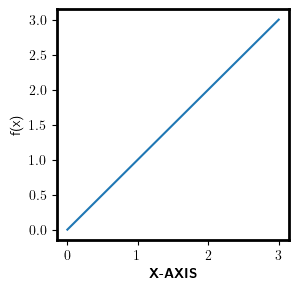

In [30]:
from matplotlib.pyplot import xlabel, ylabel
from matplotlib import rc

# ativa Latex
rc('text', usetex=True)
rc('axes', linewidth=2)
rc('font', weight='bold')

x = np.arange(4)
y = x
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(x,x)
xlabel(r'\textbf{X-AXIS}', fontsize=10);
ylabel(r'f(x)', fontsize=10);


from matplotlib import rcdefaults
rcdefaults()


## Pontos vs. _pixels_ e resolução

- O `matplotlib` usa pontos e não pixels para medir o tamanho de figuras. Por padrão, 1 pt $\approx$ 1/72 inch. 
- O controle de resolução da imagem pronta para publicação a ser gerada é feito pela alteração dos "pontos por polegada" (_dots per inch_), i.e. o argumento `dpi` na geração de imagens.

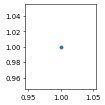

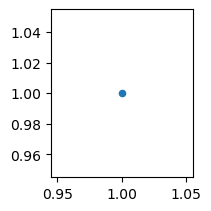

In [31]:
fig, ax = plt.subplots(constrained_layout=True, # controle de interpadding
                       figsize=(2,2),
                       dpi=50                       
                       ) 
ax.scatter(1,1,s=20)

fig, ax = plt.subplots(constrained_layout=True, # controle de interpadding
                       figsize=(2,2),
                       dpi=100                    
                       ) 
ax.scatter(1,1,s=20);

## Trabalhando com objetos geométricos primitivos (`patches`)

- Para o `matplotlib`, um `patch` é um objeto da classe `Artist` que representa uma geometria primitiva 2D com face e aresta. 

- Classes disponíveis: `Annulus`, `Arc`, `Arrow`, `CirclePolygon`, `Circle`, `ConnectionPatch`, `Ellipse`, `FancyArrowPatch`, `FancyArrow`, `FancyBboxPatch`, `Patch`, `PathPatch`, `Polygon`, `Rectangle`, `RegularPolygon`, `Shadow`, `StepPatch`, `Wedge`, 

### Imprimindo subclasses de `Patch`

In [32]:
import matplotlib.patches as ptc

# Classes do módulo 'patches'. Nota: 'type' é a classe base para todas as classes em Python
all_ptc_cls = [cls for cls in ptc.__dict__.values() if isinstance(cls, type)] 

# Filtra as classes que herdam de Patch
ptc_cls = [cls for cls in all_ptc_cls if issubclass(cls, ptc.Patch)]

# Imprime os nomes das classes de Patch
ptc_c = []
for cls in ptc_cls:
    ptc_c.append(cls.__name__)
      #print(cls.__name__,end=', ')
ptc_c = sorted(ptc_c)


### Exemplos gerais

- TODO

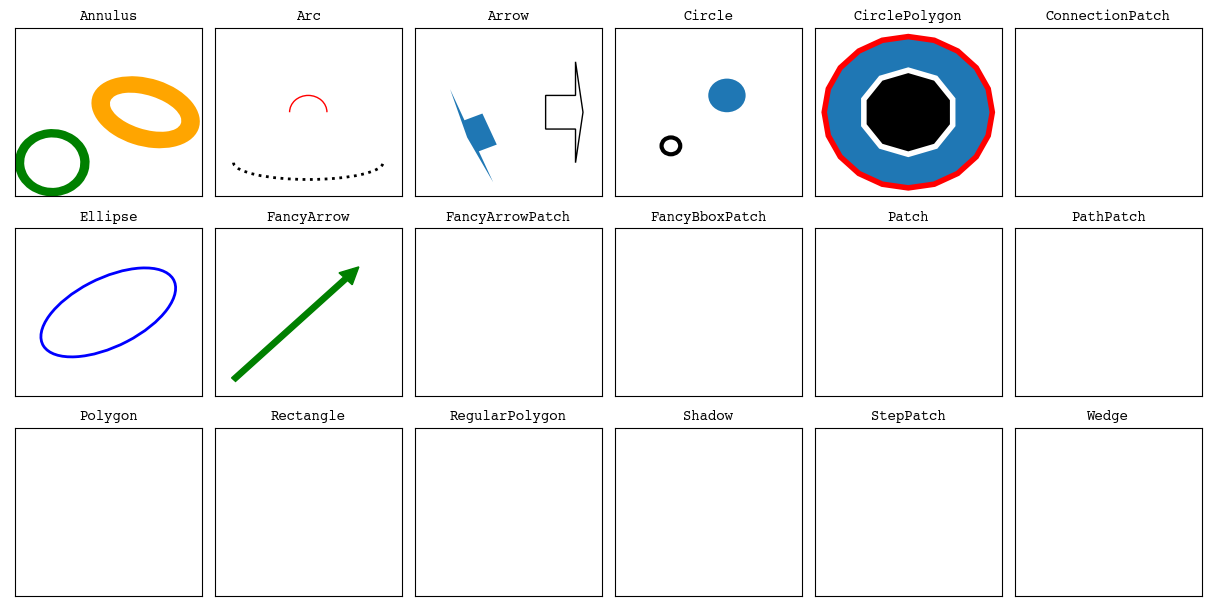

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptc

fig, ax = plt.subplots(3,6,figsize=(12,6),constrained_layout=True)

for (i,_) in enumerate(ax.flatten()):
    _.set_xticks([]); _.set_yticks([])
    _.set_title(ptc_c[i], fontsize=10, fontname='Courier')

# --- ANNULUS
a1 = ptc.Annulus(xy=(0.2,0.2),
                r=0.2, # circular: raio do círculo exterior
                width=0.05, # espessura do anel
                angle=30,
                facecolor='green')

a2 = ptc.Annulus(xy=(0.7,0.5),
                r=(0.2,0.3), # elíptico: eixo menor, eixo maior da elipse exterior
                width=0.1,
                angle=70,
                facecolor='orange')

ax[0,0].add_patch(a1); ax[0,0].add_patch(a2) 


# --- ARC
b1 = ptc.Arc(xy=(0.5,0.5),
             width=0.2,
             height=0.2,
             angle=0,
             theta1=0,
             theta2=180,
             edgecolor='red')

b2 = ptc.Arc(xy=(0.5,0.2),
             width=0.8,
             height=0.2,
             angle=0,
             theta1=180,
             theta2=360,
             facecolor='blue',
             ls=':',
             lw=2)

ax[0,1].add_patch(b1); ax[0,1].add_patch(b2) 

# --- ARROW
c1 = ptc.Arrow(x=0.7,y=0.5, # cauda
               dx=0.2,dy=0.0, # comprimento
               width = 1.0, # escala
               fill = False)

c2 = ptc.Arrow(x=0.4,y=0.4, # cauda
               dx=-0.12,dy=-0.05, # comprimento
               width = 1.0, # escala
               fill = True)

ax[0,2].add_patch(c1); ax[0,2].add_patch(c2)

# --- CIRCLE
d1 = ptc.Circle(xy=(0.6,0.6),
                radius=0.1)

d2 = ptc.Circle(xy=(0.3,0.3),
                radius=0.05,
                fill=False,
                lw=3,
                edgecolor='k')

ax[0,3].add_patch(d1); ax[0,3].add_patch(d2)

# --- CIRCLEPOLYGON
e1 = ptc.CirclePolygon(xy=(0.5,0.5),
                       radius=0.45,
                       edgecolor='r',
                       resolution=20,
                       lw=4)

e2 = ptc.CirclePolygon(xy=(0.5,0.5),
                       radius=0.25,
                       resolution=10,                       
                       facecolor='k',
                       edgecolor='w',
                       lw=4)

ax[0,4].add_patch(e1); ax[0,4].add_patch(e2)


# --- ELLIPSE
center = (0.5, 0.5)  
width = 0.8  
height = 0.4 
angle = 30  

g1 = ptc.Ellipse(center, width, height, angle=angle, edgecolor='blue', facecolor='none', linewidth=2)

ax[1,0].add_patch(g1)

# --- FANCYARROW
start_point = (0.1, 0.1)  
end_point = (0.7, 0.7)    

h1 = ptc.FancyArrow(start_point[0], start_point[1], 
                                 end_point[0] - start_point[0], end_point[1] - start_point[1],
                                 color='green', width=0.03, head_width=0.1, head_length=0.1)

ax[1,1].add_patch(h1);

#### Aplicação: bandeira do Brasil

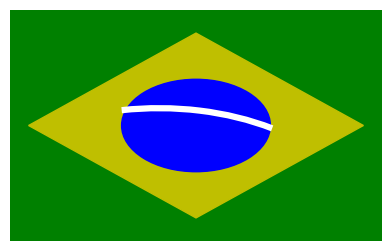

In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as ptc


# altura/largura
a = 3; b = 1.6*a

# área de plotagem
fig, ax = plt.subplots(figsize=(b,a))

# retângulo
rec = ptc.Rectangle(xy=(0,0), 
                    height=a, 
                    width=2.5*a,
                    angle=0,
                    facecolor='g',
                    edgecolor='g')

# losango
los_vertices = [(0.05,0.5), (0.5,0.1), (0.95,0.5), (0.5,0.9)]
los = ptc.Polygon(los_vertices, 
                  closed=True,
                  facecolor='y',
                  edgecolor='y')

# círculo
circ = ptc.Circle(xy=(0.5,0.5), 
                  radius = 0.2,
                  facecolor='b',
                  edgecolor='b')

# arco
center = (0.4, 0.0)
width = 1.15
height = 1.15
angle_range = (58, 100)  # Start and stop angles (degrees)
rotation_angle = 0  # Rotation angle (degrees)

arc = ptc.Arc(center, width, height, 
                  angle=rotation_angle, 
                  theta1=angle_range[0], 
                  theta2=angle_range[1], 
                  edgecolor='w', 
                  lw=4.5)

# estrelas

# adiciona patches
ax.add_patch(rec)
ax.add_patch(los)
ax.add_patch(circ)
ax.add_patch(arc)

# decorações
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False); ax.spines['left'].set_visible(False)
ax.set_xticks([]); ax.set_yticks([]); 



# Ver: https://micromath.com.br/a-geometria-da-bandeira-do-brasil/

### Desenhando com hachuras/tramas (`hatches`)

- Patching + hatching

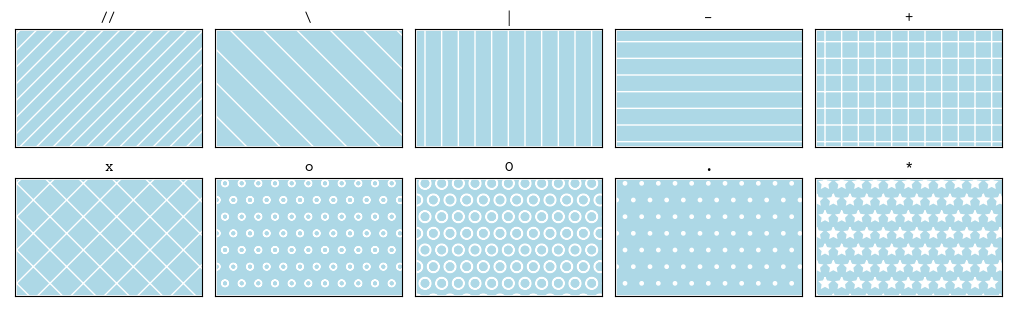

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,5,figsize=(10,3),constrained_layout=True)

hatches = ['//', '\\','|','-','+','x','o','O','.','*']

def rect(hatch):
    return ptc.Rectangle(xy=(0,0), 
                        height=1, 
                        width=2.5,
                        angle=0,
                        edgecolor='w',
                        facecolor='lightblue',                        
                        linewidth=2,
                        hatch=hatch)

for (i,_) in enumerate(ax.flatten()):
    _.set_xticks([]); _.set_yticks([])
    _.set_title(hatches[i], fontsize=10, fontname='Courier')
    _.add_patch(rect(hatches[i]))

- Ploting + hatching

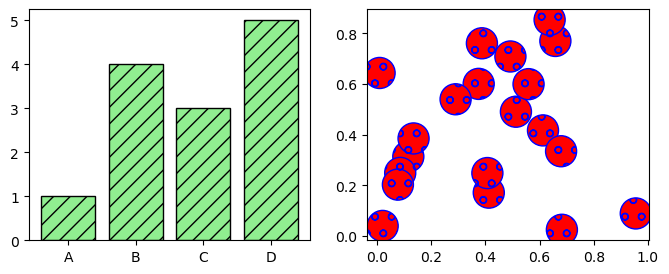

In [76]:
import matplotlib.pyplot as plt

categorias = ['A', 'B', 'C', 'D']
valores = [1, 4, 3, 5]

np.random.seed(110)
x = np.random.rand(20); y = np.random.rand(20)

fig, ax = plt.subplots(1,2,figsize=(8,3))

ax[0].bar(categorias, valores, hatch='//', edgecolor='black', color='lightgreen')
ax[1].scatter(x, y, s=500, c='red', edgecolors='b', linewidth=1, hatch='o');
